# Analysis of Voter Trends in the United States of America
### Rohan Dewan, Fall 2024 CMSC 320 Project

# Introduction
As a Computer Science and Political Science dual degree, I'm often posed with the question what are the largest intersections between my fields of study? Following the 2024 United States General Election, Political Science has never been more scrutinized. Many pundits, scholars, and voters alike have wondered how decisions were so incorrectly made, predictions fell so far from the truth, and campaign strategies had such unexpected results. Nuanced social science analysis is the backbone of political understanding, however, the randomness of election results shows that quantitative, scientific understanding is needed more than ever.

I wanted to do a political investigation for this datascience project. I intend to use election data over the last 50 or so years in presidential, sentate, and house elections to determine what political practices are best, how we can follow and predict trends, and what different campaigns/parties can do to shore up support moving forward. Some questions that I wish to answer (among others) include:
*   How do midterm elections predict presidential elections in the next cycle (and vice versa)?
*   How to different demographics (racial, regional, etc.) vote and what can political campaigns do to attract these demographics in the future?
*   How has campaign spending influenced election outcomes?

Throughout this tutorial, I will properly clean my data, make preliminary observations, feature engineer, and apply machine learning methods to create recommendation and prediction models. Paired with my data visualizations, I'll use all my findings to make policy suggestions that political groups and parties can use in future elections. In this new era of political uncertainty, these findings will prove vital.

# Data Curation

I've sourced all my data frome https://dataverse.harvard.edu/dataverse/harvard which uses data from MIT's election data and science lab. It has detailed information about senate, congressional, and presidential elections that span from 1976 to 2022 (only 2020 when it comes to presidential elections). I downloaded these three datasets and uploaded it to my google drive. From there, I imported these csv files as Dataframes using pandas's read_csv function.

In [2]:
# These are the tools and libraries I will make use of throughout the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
from scipy.stats import chi2_contingency

**Below, we will import a csv that has all presidential election data from 1976 to 2020**

In [ ]:
president_df = pd.read_csv('/content/drive/MyDrive/320 Datasets/1976-2020-president.csv')
print(president_df.shape)
president_df.head(10)

(4287, 15)


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


**Below, we will import a csv that has all house election data from 1976 to 2022**

In [ ]:
house_df = pd.read_csv('/content/drive/MyDrive/320 Datasets/1976-2022-house.csv')
print(house_df.shape)
house_df.head(10)

(32452, 20)


,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
0,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,BILL DAVENPORT,DEMOCRAT,False,TOTAL,58906,157170,False,20230706,False
1,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,JACK EDWARDS,REPUBLICAN,False,TOTAL,98257,157170,False,20230706,False
2,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,WRITEIN,NaN,True,TOTAL,7,157170,False,20230706,False
3,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,J CAROLE KEAHEY,DEMOCRAT,False,TOTAL,66288,156362,False,20230706,False
4,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,False,TOTAL,90069,156362,False,20230706,False
5,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,WRITEIN,NaN,True,TOTAL,5,156362,False,20230706,False
6,1976,ALABAMA,AL,1,63,41,US HOUSE,3,GEN,False,False,BILL NICHOLS,DEMOCRAT,False,TOTAL,106935,108048,False,20230706,False
7,1976,ALABAMA,AL,1,63,41,US HOUSE,3,GEN,False,False,OGBURN GARDNER,PROHIBITION,False,TOTAL,1111,108048,False,20230706,False
8,1976,ALABAMA,AL,1,63,41,US HOUSE,3,GEN,False,False,WRITEIN,NaN,True,TOTAL,2,108048,False,20230706,False
9,1976,ALABAMA,AL,1,63,41,US HOUSE,4,GEN,False,False,LEONARD WILSON,REPUBLICAN,False,TOTAL,34531,176022,False,20230706,False


**Below, we will import a csv that has all senate election data from 1976 to 2022**

In [ ]:
senate_df = pd.read_csv('/content/drive/MyDrive/320 Datasets/1976-2020-senate.csv')
print(senate_df.shape)
senate_df.head(10)

(3629, 19)


,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER
5,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,JACK MCCOY,AMERICAN INDEPENDENT,False,total,82739,7470586,False,20210114,OTHER
6,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,S. I. (SAM) HAYAKAWA,REPUBLICAN,False,total,3748973,7470586,False,20210114,REPUBLICAN
7,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,JOHN V. TUNNEY,DEMOCRAT,False,total,3502862,7470586,False,20210114,DEMOCRAT
8,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,OMARI MUSA,INDEPENDENT,False,total,31629,7470586,False,20210114,OTHER
9,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,DAVID WALD,PEACE AND FREEDOM,False,total,104383,7470586,False,20210114,OTHER


I also want to find population data for different states. This information may be helpful later on in our exploratory and primary analysis. To do this, I'll webscrape from https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html. A helpful tool that you can use for this is the Beautiful Soup Python library which you can read more about here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/.

In [11]:
# Extracting information from census.gov
url = "https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html"
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the webpage")
else:
    print(f"Failed to fetch the webpage: {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')

dataframes = []
for i, table in enumerate(tables):
    # Read the HTML table into a Pandas DataFrame
    population_df = pd.read_html(str(table))[0]
    dataframes.append(population_df)
    print(f"Processed table {i + 1}")

# Storing CSV to avoid going through the entire webscraping process again later is a good idea for maintenance and efficiency if ever required
for i, df in enumerate(dataframes):
    df.to_csv(f"table_{i + 1}.csv", index=False)

population_df

Successfully fetched the webpage
Processed table 1


<ipython-input-11-49c0c810aff6>:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  population_df = pd.read_html(str(table))[0]


,State or Region,2020 Census,2010 Census,2000 Census,1990 Census,1980 Census,1970 Census,1960 Census,1950 Census,1940 Census,1930 Census,1920 Census,1910 Census
0,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
1,Resident Population,331449281,308745538,281421906,248709873,226545805,203211926,179323175,151325798,132165129,123202660,106021568,92228531
2,Percent Change,7.4%,9.7%,13.2%,9.8%,11.5%,13.3%,18.5%,14.5%,7.3%,16.2%,15.0%,21.0%
3,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast,Northeast
4,Resident Population,57609148,55317240,53594378,50809229,49135283,49040703,44677819,39477986,35976777,34427091,29662053,25868573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Resident Population,576851,563626,493782,453588,469557,332416,330066,290529,250742,225565,194402,145965
167,Percent Change,2.3%,14.1%,8.9%,-3.4%,41.3%,0.7%,13.6%,15.9%,11.2%,16.0%,33.2%,57.7%
168,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico
169,Resident Population,3285874,3725789,3808610,3522037,3196520,2712033,2349544,2210703,1869255,1543913,1299809,1118012


# **Cleaning Data**
Often in data science projects, the standard procedure is to convert date and time into NumPy's datetime format for more functionality and standardization. However, since we are only dealing with election years and not more specific date or time information, we can leave this field/feature in int64 for all of our dataframes. Everything else will be stored in string form.

In [ ]:
for col in president_df.columns:
  if president_df[col].dtype == 'object':
    president_df[col] = president_df[col].astype('str')
president_df['writein'] = president_df['writein'].map({'True': True, 'False': False})

# The datasets have many additional columns about election particulars that will not be important for our analysis
president_df = president_df[(president_df['writein'] == False)]
president_df.drop(columns=['writein', 'party_detailed', 'version', 'notes', 'state_fips', 'state_cen', 'state_ic'], inplace=True)
president_df = president_df.groupby(['year', 'state'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))
president_df.reset_index(drop=True, inplace=True)
president_df.rename(columns={'party_simplified': 'party'}, inplace=True)
president_df['party'] = np.where(president_df['party'].isin(['DEMOCRAT', 'REPUBLICAN']), president_df['party'], 'OTHER') # Reduce analysis to three party categories

president_df

<ipython-input-267-61c3213898d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  president_df.drop(columns=['writein', 'party_detailed', 'version', 'notes', 'state_fips', 'state_cen', 'state_ic'], inplace=True)
<ipython-input-267-61c3213898d2>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  president_df = president_df.groupby(['year', 'state'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))


,year,state,state_po,office,candidate,candidatevotes,totalvotes,party
0,1976,ALABAMA,AL,US PRESIDENT,"CARTER, JIMMY",659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,US PRESIDENT,"FORD, GERALD",504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,US PRESIDENT,"MADDOX, LESTER",9198,1182850,OTHER
3,1976,ALASKA,AK,US PRESIDENT,"FORD, GERALD",71555,123574,REPUBLICAN
4,1976,ALASKA,AK,US PRESIDENT,"CARTER, JIMMY",44058,123574,DEMOCRAT
...,...,...,...,...,...,...,...,...
1821,2020,WISCONSIN,WI,US PRESIDENT,"TRUMP, DONALD J.",1610184,3298041,REPUBLICAN
1822,2020,WISCONSIN,WI,US PRESIDENT,"JORGENSEN, JO",38491,3298041,OTHER
1823,2020,WYOMING,WY,US PRESIDENT,"TRUMP, DONALD J.",193559,278503,REPUBLICAN
1824,2020,WYOMING,WY,US PRESIDENT,"BIDEN, JOSEPH R. JR",73491,278503,DEMOCRAT


In [ ]:
for col in house_df.columns:
  if house_df[col].dtype == 'object':
    house_df[col] = house_df[col].astype('str')

# The datasets have many additional columns about election particulars that will not be important for our analysis
house_df = house_df[house_df['fusion_ticket'] == False] # Fusion tickets are too difficult to process so we will exclude from analysis
house_df.drop(columns=['writein', 'special', 'mode', 'unofficial', 'state_fips', 'state_cen', 'state_ic', 'version', 'runoff', 'fusion_ticket'], inplace=True)
house_df = house_df.groupby(['year', 'state', 'district'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))
house_df.reset_index(drop=True, inplace=True)
house_df = house_df[house_df['candidate'] != "WRITEIN"]
house_df['party'] = np.where(house_df['party'].isin(['DEMOCRAT', 'REPUBLICAN']), house_df['party'], 'OTHER') # Reduce analysis to three party categories

house_df

<ipython-input-266-8c3b6b0e13f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df.drop(columns=['writein', 'special', 'mode', 'unofficial', 'state_fips', 'state_cen', 'state_ic', 'version', 'runoff', 'fusion_ticket'], inplace=True)
<ipython-input-266-8c3b6b0e13f3>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  house_df = house_df.groupby(['year', 'state', 'district'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))


,year,state,state_po,office,district,stage,candidate,party,candidatevotes,totalvotes
0,1976,ALABAMA,AL,US HOUSE,1,GEN,JACK EDWARDS,REPUBLICAN,98257,157170
1,1976,ALABAMA,AL,US HOUSE,1,GEN,BILL DAVENPORT,DEMOCRAT,58906,157170
3,1976,ALABAMA,AL,US HOUSE,2,GEN,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,90069,156362
4,1976,ALABAMA,AL,US HOUSE,2,GEN,J CAROLE KEAHEY,DEMOCRAT,66288,156362
6,1976,ALABAMA,AL,US HOUSE,3,GEN,BILL NICHOLS,DEMOCRAT,106935,108048
...,...,...,...,...,...,...,...,...,...,...
26002,2022,WISCONSIN,WI,US HOUSE,8,GEN,PAUL DAVID BOUCHER,OTHER,48896,310196
26003,2022,WISCONSIN,WI,US HOUSE,8,GEN,JACOB J VANDENPLAS,OTHER,32057,310196
26004,2022,WYOMING,WY,US HOUSE,0,GEN,HARRIET HAGEMAN,REPUBLICAN,132206,198198
26005,2022,WYOMING,WY,US HOUSE,0,GEN,LYNNETTE GREYBULL,DEMOCRAT,47250,198198


In [ ]:
for col in senate_df.columns:
  if senate_df[col].dtype == 'object':
    senate_df[col] = senate_df[col].astype('str')

senate_df = senate_df[(senate_df['writein'] == False) & (senate_df['special'] == False)]
print(senate_df.shape)

# The datasets have many additional columns about election particulars that will not be important for our analysis
senate_df.drop(columns=['writein', 'special', 'party_detailed', 'mode', 'unofficial', 'state_fips', 'state_cen', 'state_ic'], inplace=True)
senate_df = senate_df.groupby(['year', 'state'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))
senate_df.reset_index(drop=True, inplace=True)
senate_df.rename(columns={'party_simplified': 'party'}, inplace=True)
senate_df['party'] = np.where(senate_df['party'].isin(['DEMOCRAT', 'REPUBLICAN']), senate_df['party'], 'OTHER') # Reduce analysis to three party categories

senate_df

(3044, 19)


<ipython-input-265-2bb6c976de7f>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  senate_df = senate_df.groupby(['year', 'state'], group_keys=False).apply(lambda x: x.nlargest(3, 'candidatevotes'))


,year,state,state_po,office,district,stage,candidate,candidatevotes,totalvotes,version,party
0,1976,ARIZONA,AZ,US SENATE,statewide,gen,DENNIS DECONCINI,400334,741210,20210114,DEMOCRAT
1,1976,ARIZONA,AZ,US SENATE,statewide,gen,SAM STEIGER,321236,741210,20210114,REPUBLICAN
2,1976,ARIZONA,AZ,US SENATE,statewide,gen,BOB FIELD,10765,741210,20210114,OTHER
3,1976,CALIFORNIA,CA,US SENATE,statewide,gen,S. I. (SAM) HAYAKAWA,3748973,7470586,20210114,REPUBLICAN
4,1976,CALIFORNIA,CA,US SENATE,statewide,gen,JOHN V. TUNNEY,3502862,7470586,20210114,DEMOCRAT
...,...,...,...,...,...,...,...,...,...,...,...
2078,2020,WYOMING,WY,US SENATE,statewide,gen,CYNTHIA M. LUMMIS,198100,278503,20210114,OTHER
2079,2020,WYOMING,WY,US SENATE,statewide,gen,MERAV BEN DAVID,72766,278503,20210114,OTHER
2080,2020,WYOMING,WY,US SENATE,statewide,gen,UNDER VOTES,6401,278503,20210114,OTHER
2081,2021,GEORGIA,GA,US SENATE,statewide,runoff,JON OSSOFF,2269262,4483241,20210114,DEMOCRAT


**We need to clean our population dataframe because webscraping leaves it in the form of the website and not our condensed and concise dataframe**

In [12]:
# remove all regional and nationwide data that won't be applicable
rows_to_remove = range(0, 15)
population_df = population_df.drop(population_df.index[rows_to_remove])
population_df.reset_index(drop=True, inplace=True)
population_df


population_df = population_df[population_df["State or Region"] != "Percent Change"]

# forward fill function will allow us to combine the state/region row with the actual population numbers
population_df["State or Region"] = population_df["State or Region"].replace("Resident Population", pd.NA).ffill()

population_df = population_df[population_df["State or Region"] != "Resident Population"]

population_df = population_df.reset_index(drop=True)

population_df = population_df.iloc[1::2]

# We are only dealing with census reports that overlap with our datasets
population_df.drop(columns=['1910 Census', '1920 Census', '1930 Census', '1940 Census', '1950 Census', '1960 Census'], inplace=True)

population_df.rename(columns={'State or Region': 'state'}, inplace=True)
population_df.columns = population_df.columns.str.replace("Census", "", regex=True).str.strip()
population_df.reset_index(drop=True, inplace=True)

population_df

,state,2020,2010,2000,1990,1980,1970
0,Alabama,5024279,4779736,4447100,4040587,3893888,3444165
1,Alaska,733391,710231,626932,550043,401851,300382
2,Arizona,7151502,6392017,5130632,3665228,2718215,1770900
3,Arkansas,3011524,2915918,2673400,2350725,2286435,1923295
4,California,39538223,37253956,33871648,29760021,23667902,19953134
5,Colorado,5773714,5029196,4301261,3294394,2889964,2207259
6,Connecticut,3605944,3574097,3405565,3287116,3107576,3031709
7,Delaware,989948,897934,783600,666168,594338,548104
8,District of Columbia,689545,601723,572059,606900,638333,756510
9,Florida,21538187,18801310,15982378,12937926,9746324,6789443


# **Exploratory Data Analysis and Data Visualization**

I'd like to see if house congressional races during the midterms are an accurate predictor for how a state will vote for the next presidential election. We can average the results of each state's house elections during the midterm to get the majority party and then see how often this party matches the winning party per vote during the subsequent presidential election.

In [ ]:
# Create a list of just the midterm elections so we can easily narrow down dataframe
midterm_years = [1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]
midterm_df = house_df[house_df['year'].isin(midterm_years)]

# I combine the votes for each election by state and party to give us a rough idea of which party "won support dominantly"
midterm_results = midterm_df.groupby(['year', 'state', 'party'])['candidatevotes'].sum().reset_index()
max_votes = midterm_results.groupby(['year', 'state'])['candidatevotes'].transform('max')
midterm_results = midterm_results[midterm_results['candidatevotes'] == max_votes]
midterm_results.reset_index(drop=True, inplace=True)
midterm_results

# Do the same thing with the presidential election years with the president df
presidential_results = president_df.groupby(['year', 'state', 'party'])['candidatevotes'].sum().reset_index()
max_votes = presidential_results.groupby(['year', 'state'])['candidatevotes'].transform('max')
presidential_results = presidential_results[presidential_results['candidatevotes'] == max_votes]

midterm_results['year'] = midterm_results['year'].astype(int) + 2

merged_df = pd.merge(midterm_results, presidential_results, on=['year', 'state'], how='inner', suffixes=('_midterm', '_presidential'))
merged_df

,year,state,party_midterm,candidatevotes_midterm,party_presidential,candidatevotes_presidential
0,1980,ALABAMA,DEMOCRAT,439564,REPUBLICAN,654192
1,1980,ALASKA,REPUBLICAN,68811,REPUBLICAN,86112
2,1980,ARIZONA,DEMOCRAT,261567,REPUBLICAN,529688
3,1980,ARKANSAS,REPUBLICAN,195371,REPUBLICAN,403164
4,1980,CALIFORNIA,DEMOCRAT,3335332,REPUBLICAN,4522994
...,...,...,...,...,...,...
545,2020,VIRGINIA,DEMOCRAT,1867061,DEMOCRAT,2413568
546,2020,WASHINGTON,DEMOCRAT,1888593,DEMOCRAT,2369612
547,2020,WEST VIRGINIA,REPUBLICAN,337146,REPUBLICAN,545382
548,2020,WISCONSIN,DEMOCRAT,1367492,DEMOCRAT,1630866


In [ ]:
contingency_table = pd.crosstab(merged_df['party_midterm'], merged_df['party_presidential'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)

66.6028010301778
3.446557407030272e-15


Based on these results, we can conclude there is a significant relationship between midterm party and presidential party per state in a midterm/general election cycle. The p value is far below 0.05 so we can reject the null hypothesis that midterm majority party doesn't predict presidential majority party for each state and accept the alternative hypothesis that it does.

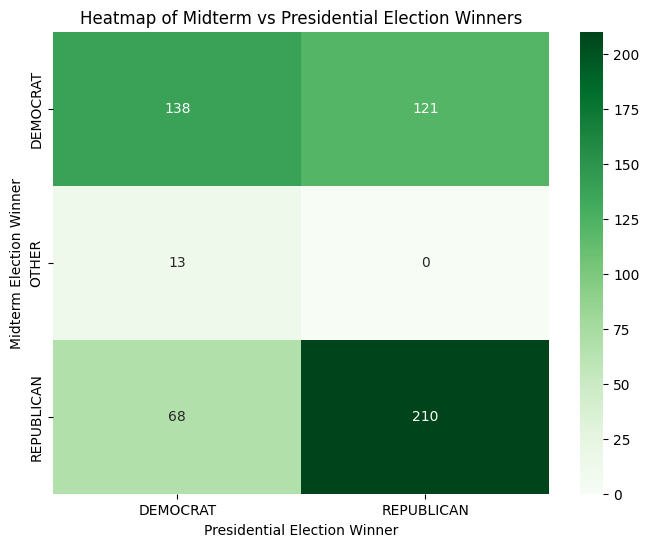

In [ ]:
heatmap_data = merged_df.pivot_table(index='party_midterm', columns='party_presidential', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Greens')
plt.title('Heatmap of Midterm vs Presidential Election Winners')
plt.ylabel('Midterm Election Winner')
plt.xlabel('Presidential Election Winner')
plt.show()

Next, I want to see if presidential, senate, and house party votes are consistent. Our null hypothesis would be that the mean vote counts for all parties across senate, house, and presidential elections are equal. Alternative hypothesis would be at least one election type has a different mean vote count.

In [ ]:
senate_total = senate_df.groupby(['year', 'party'], group_keys=False)['candidatevotes'].sum()
house_total = house_df.groupby(['year', 'party'], group_keys=False)['candidatevotes'].sum()
president_total = president_df.groupby(['year', 'party'], group_keys=False)['candidatevotes'].sum()
president_total.rename('candidatevotes_president', inplace=True)

senate_total = senate_total.reset_index()
house_total = house_total.reset_index()
president_total = president_total.reset_index()

merged_df = pd.merge(senate_total, house_total, on=['year', 'party'], how='inner', suffixes=('_senate', '_house'))
merged_df = pd.merge(merged_df, president_total, on=['year', 'party'], how='inner')
merged_df

,year,party,candidatevotes_senate,candidatevotes_house,candidatevotes_president
0,1976,DEMOCRAT,31790526,39360210,40680446
1,1976,OTHER,1888824,1044276,1123524
2,1976,REPUBLICAN,24562431,29777957,38870893
3,1980,DEMOCRAT,30612805,37429444,35480948
4,1980,OTHER,1178417,1115481,5726546
5,1980,REPUBLICAN,26376614,35074657,43642639
6,1984,DEMOCRAT,22218744,40852918,37449813
7,1984,OTHER,298438,684132,607073
8,1984,REPUBLICAN,22850493,36386131,54166829
9,1988,DEMOCRAT,35137786,40564207,41716679


In [ ]:
senate_vote = merged_df['candidatevotes_senate']
house_vote = merged_df['candidatevotes_house']
president_vote = merged_df['candidatevotes_president']
f_statistic, p_value = stats.f_oneway(senate_vote, house_vote, president_vote)
print(p_value)
print(f_statistic)

0.03583695120975327
3.4365729083131966


It's clear that parties don't receive the same number of senate, house, and presidential votes in an election based on our p value less than 0.05. We can visualize the differences more with a bar graph.

<ipython-input-293-3a4fbb1c595b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns = {
<ipython-input-293-3a4fbb1c595b>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=long_df, x='Election', y='Votes', hue='Election_Type', ci=None)


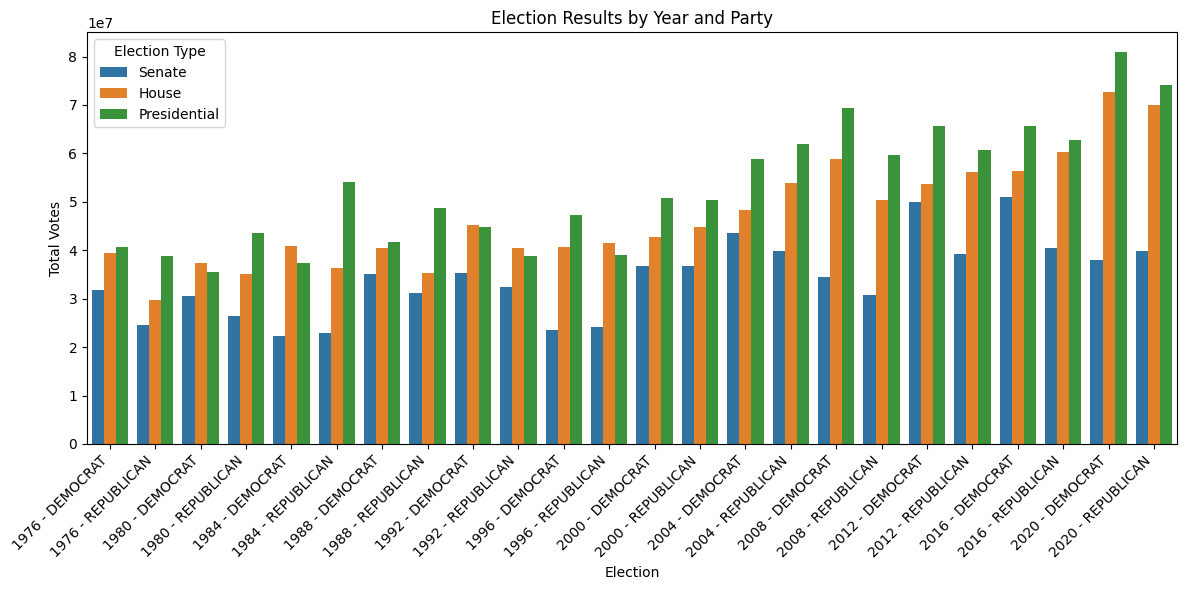

In [ ]:
merged_df.rename(columns = {
    'candidatevotes_senate': 'Senate',
    'candidatevotes_house': 'House',
    'candidatevotes_president': 'Presidential'
}, inplace=True)

# Melt the DataFrame for easier plotting
long_df = pd.melt(merged_df, id_vars=['year', 'party'],
                  value_vars=['Senate', 'House', 'Presidential'],
                  var_name='Election_Type', value_name='Votes')

# Create a new column for better x-axis labeling
long_df['Election'] = long_df['year'].astype(str) + ' - ' + long_df['party']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='Election', y='Votes', hue='Election_Type', ci=None)

# Customize plot
plt.title('Election Results by Year and Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Election Type', loc='upper left')
plt.tight_layout()
plt.show()

From this graph we can see that dominance in one field does not necessarily translates to dominance in the other two. Parties may perform far better in a presidential race but lose to the other in the house and senate. This shows that we will need to perform more nuanced machine learning to understand why this is and extract meaningful trends.

Next, we will do a simple test to see if republicans have on average a greater share of the senate and house vote than democrats do by comparing all house and senate elections between and seeing if the republican average is statistically signficantly larger.

In [ ]:
house_adjusted = house_df[house_df['party'] != "OTHER"]
senate_adjusted = senate_df[senate_df['party'] != "OTHER"]

house_adjusted.drop(columns={'state_po', 'district', 'stage', 'candidate'})
dem_house = house_adjusted[house_adjusted['party'] == 'DEMOCRAT']['candidatevotes']
rep_house = house_adjusted[house_adjusted['party'] == 'REPUBLICAN']['candidatevotes']
t_house, p_house = stats.ttest_ind(rep_house, dem_house, alternative='greater')
print(p_house)
print(t_house)

senate_adjusted
senate_adjusted.drop(columns={'state_po', 'office', 'district', 'candidate', 'version'})
dem_senate = senate_adjusted[senate_adjusted['party'] == 'DEMOCRAT']['candidatevotes']
rep_senate = senate_adjusted[senate_adjusted['party'] == 'REPUBLICAN']['candidatevotes']
t_senate, p_senate = stats.ttest_ind(rep_senate, dem_senate, alternative='greater')
print(p_senate)
print(t_senate)

0.7755366151331108
-0.7572216549189181
0.9617772708402228
-1.7729131744810809


Based on our two t-tests, we see that there is no statistical signficance with a massive p-value so we can't reject our null hypothesis for either test. Thus, it stands that both the Republican houe and senate average vote is less than or equal to the Democratic one.

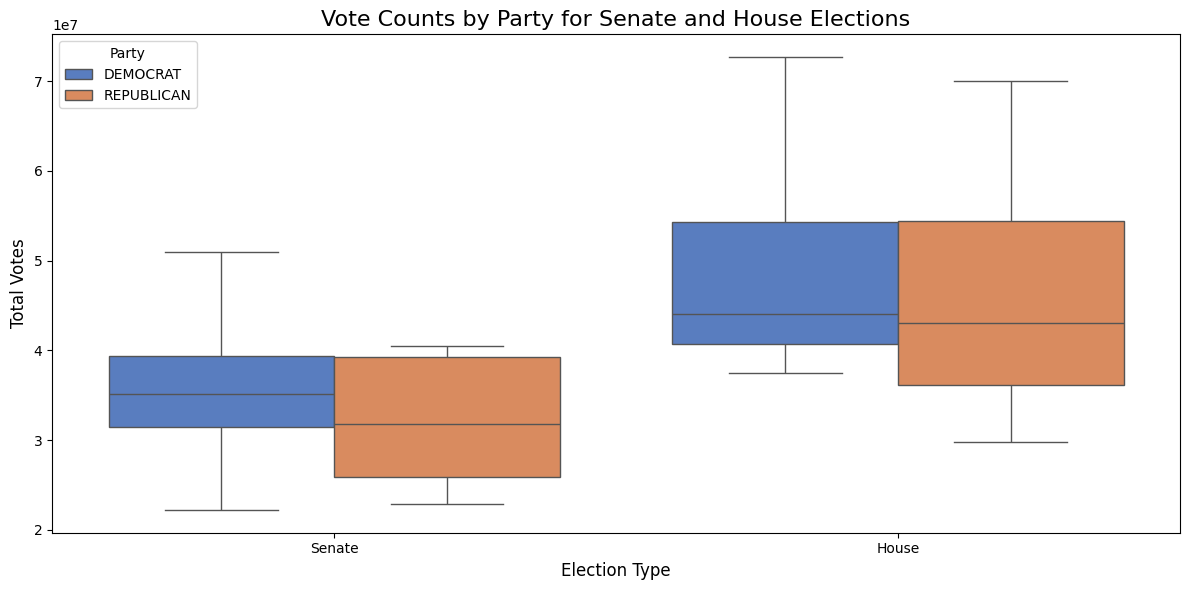

In [ ]:
long_df = pd.melt(merged_df, id_vars=['year', 'party'],
                  value_vars=['candidatevotes_senate', 'candidatevotes_house'],
                  var_name='Election_Type', value_name='Votes')

long_df['Election_Type'] = long_df['Election_Type'].replace({
    'candidatevotes_senate': 'Senate',
    'candidatevotes_house': 'House'
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='Election_Type', y='Votes', hue='party', data=long_df, palette='muted')

plt.title('Vote Counts by Party for Senate and House Elections', fontsize=16)
plt.xlabel('Election Type', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


What's interesting from this plot is that we see the upper bounds for the interquartial ranges of both parties in both types of legislative elections are extremely similar. However, the Republicans have much lower lower bounds for the IQRs. The max and min values for the house also indicat the the Democrats have had more blowout victories in the past compared to the Republicans. The senate is slightly more even except for a larger max value for the Democrats. Still, this is very aggregated information so we need to perform for specific machine learning and primary data analysis.

- recommendation model
- feature engineering/dimensionality reduction
- prediction model if you have time

# Analysis, Hypothesis Testing and Machine Learning